In [272]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [273]:
df = pd.read_csv(r"C:/Users/ketka/Desktop/Internshala/UpGrad/bank-additional-full.csv",sep=';')

In [275]:
descriptive=df.describe()
descriptive.to_csv("C:/Users/ketka/Desktop/Internshala/descriptive.csv",index=False)

In [277]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [142]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [280]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [143]:
df["cons.conf.idx"].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

In [144]:
final_df = pd.DataFrame()
"""train_df.drop(columns=['batch_enrolled', 'desc', 'zip_code'], axis=1)"""
grouped = df[["job",'marital','education','contact','month','day_of_week','poutcome']]
grouped = pd.get_dummies(grouped)
final_df= pd.concat([final_df, grouped], axis=1)
df["default_binary"]=0
df["housing_binary"]=0
df["loan_binary"]=0
df["y_label"]=0
df.loc[df["default"]=="yes","default_binary"]=1
df.loc[df["default"]!="yes","default_binary"]=0
df.loc[df["housing"]=="yes","housing_binary"]=1
df.loc[df["housing"]!="yes","housing_binary"]=0
df.loc[df["loan"]=="yes","loan_binary"]=1
df.loc[df["loan"]!="yes","loan_binary"]=0
df.loc[df["y"]=="yes","y_label"]=1
df.loc[df["y"]!="yes","y_label"]=0
grouped=df[["default_binary","housing_binary","loan_binary"]]
final_df= pd.concat([final_df, grouped], axis=1)
grouped=df[["age",'duration','campaign','pdays',"previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]]
final_df= pd.concat([final_df, grouped], axis=1)
final_df= pd.concat([final_df, df["y_label"]], axis=1)
#grouped = df[['annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries','tot_cur_bal', 'tot_coll_amt', 'open_acc']]

In [145]:
final_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_label
0,0,0,0,1,0,0,0,0,0,0,...,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,0,0,0,0,0,0,0,1,0,0,...,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,0,0,0,0,0,0,0,1,0,0,...,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,0,0,0,0,0,0,0,0,...,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,0,0,0,0,0,0,0,1,0,0,...,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
5,0,0,0,0,0,0,0,1,0,0,...,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
6,1,0,0,0,0,0,0,0,0,0,...,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
7,0,1,0,0,0,0,0,0,0,0,...,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
8,0,0,0,0,0,0,0,0,0,1,...,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
9,0,0,0,0,0,0,0,1,0,0,...,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [173]:
df["y_label"].value_counts()

0    36548
1     4640
Name: y_label, dtype: int64

In [202]:
X = final_df
y = final_df["y_label"]
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,stratify=y, random_state=3)
#print(X,y)

In [203]:
from sklearn.utils import resample
df_majority = final_df[final_df["y_label"]==0]
df_minority = final_df[final_df["y_label"]==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,      
                                 n_samples=36548,
                                 random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled["y_label"].value_counts()

1    36548
0    36548
Name: y_label, dtype: int64

In [204]:
y = df_upsampled["y_label"]
X = df_upsampled.drop('y_label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,stratify=y, random_state=3)

In [194]:
df_majority = final_df[final_df["y_label"]==0]
df_minority = final_df[final_df["y_label"]==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4640,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled["y_label"].value_counts()

1    4640
0    4640
Name: y_label, dtype: int64

In [196]:
y = df_downsampled["y_label"]
X = df_downsampled.drop('y_label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,stratify=y, random_state=3)

In [205]:
from sklearn.ensemble import RandomForestClassifier
steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=45, max_depth=25, random_state=3,class_weight="balanced"))
]
rf_clf = Pipeline(steps)
rf_clf.fit(X_train, y_train) 

Pipeline(memory=None,
     steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=25, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity...estimators=45, n_jobs=1, oob_score=False, random_state=3,
            verbose=0, warm_start=False))])

In [206]:
rf_clf.score(X_test, y_test)

0.9637736675057459

In [207]:
y_pred_prob=rf_clf.predict_proba(X_test)
y_pred_train_prob=rf_clf.predict_proba(X_train)
y_pred_prob

array([[0.95555556, 0.04444444],
       [0.04251798, 0.95748202],
       [0.00671916, 0.99328084],
       ...,
       [0.01287238, 0.98712762],
       [1.        , 0.        ],
       [0.00952381, 0.99047619]])

In [210]:
threshold=0.5
predicted_test = (y_pred_prob[:,1] >= threshold).astype('int')
predicted_train = (y_pred_train_prob[:,1] >= threshold).astype('int')

In [211]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, predicted_test))
print("Accuracy:",accuracy_score(y_train, predicted_train))
print(classification_report(y_test, predicted_test, target_names=['0','1']))

Accuracy: 0.963718944949108
Accuracy: 0.9994345335814089
             precision    recall  f1-score   support

          0       1.00      0.93      0.96      9137
          1       0.93      1.00      0.96      9137

avg / total       0.97      0.96      0.96     18274



No handles with labels found to put in legend.


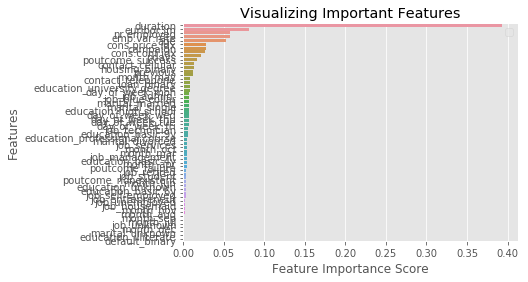

duration                         3.934292e-01
euribor3m                        8.103836e-02
nr.employed                      5.747330e-02
emp.var.rate                     5.699052e-02
age                              5.299364e-02
cons.price.idx                   2.835234e-02
campaign                         2.825882e-02
cons.conf.idx                    2.667540e-02
pdays                            2.219965e-02
poutcome_success                 1.730863e-02
contact_cellular                 1.282204e-02
housing_binary                   1.273720e-02
previous                         1.177465e-02
month_may                        1.169630e-02
contact_telephone                8.441538e-03
loan_binary                      8.289207e-03
education_university.degree      7.723053e-03
day_of_week_mon                  7.697984e-03
job_admin.                       7.542627e-03
job_blue-collar                  7.482368e-03
marital_married                  7.343718e-03
marital_single                   7

In [212]:
import pandas as pd
feature_imp = pd.Series(rf_clf.named_steps['model'].feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
print(feature_imp)

In [214]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp=confusion_matrix(y_test, predicted_test,labels=[0,1]).ravel()
print(tn, fp, fn, tp)

8490 647 16 9121


In [216]:
X = final_df
y = final_df["y_label"]
X=X.drop('y_label',axis=1)

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,stratify=y, random_state=3)

In [218]:
from sklearn.ensemble import RandomForestClassifier
steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=45, max_depth=25, random_state=3,class_weight="balanced"))
]
rf_clf = Pipeline(steps)
rf_clf.fit(X_train, y_train) 

Pipeline(memory=None,
     steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=25, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity...estimators=45, n_jobs=1, oob_score=False, random_state=3,
            verbose=0, warm_start=False))])

In [220]:
y_pred_prob=rf_clf.predict_proba(X_test)
y_pred_train_prob=rf_clf.predict_proba(X_train)
y_pred_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [224]:
threshold=0.4
predicted_test = (y_pred_prob[:,1] >= threshold).astype('int')
predicted_train = (y_pred_train_prob[:,1] >= threshold).astype('int')

In [225]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, predicted_test))
print("Accuracy:",accuracy_score(y_train, predicted_train))
print(classification_report(y_test, predicted_test, target_names=['0','1']))

Accuracy: 0.9082256968048946
Accuracy: 0.9983166618108834
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      9137
          1       0.59      0.61      0.60      1160

avg / total       0.91      0.91      0.91     10297



No handles with labels found to put in legend.


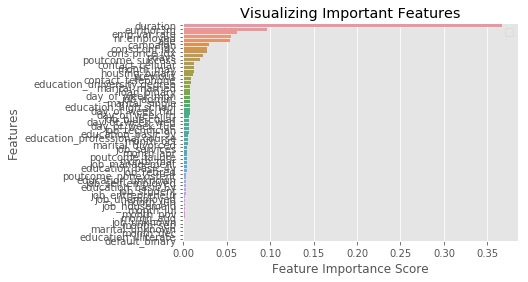

duration                         0.367069
euribor3m                        0.096765
emp.var.rate                     0.061927
nr.employed                      0.054882
age                              0.053762
campaign                         0.029028
cons.conf.idx                    0.026795
cons.price.idx                   0.026727
pdays                            0.022194
poutcome_success                 0.018941
contact_cellular                 0.012470
month_may                        0.012111
housing_binary                   0.012071
previous                         0.011652
contact_telephone                0.009139
education_university.degree      0.008425
marital_married                  0.008155
loan_binary                      0.008028
day_of_week_mon                  0.007964
job_admin.                       0.007821
marital_single                   0.007659
education_high.school            0.007608
day_of_week_thu                  0.007548
day_of_week_fri                  0

In [226]:
import pandas as pd
feature_imp = pd.Series(rf_clf.named_steps['model'].feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
print(feature_imp)

In [227]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp=confusion_matrix(y_test, predicted_test,labels=[0,1]).ravel()
print(tn, fp, fn, tp)

8649 488 457 703


In [248]:
df1=df.loc[df['y']=="yes"]

In [249]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,default_binary,housing_binary,loan_binary,y_label
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,1
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,1
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,0,0,1
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,1
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,1
182,42,blue-collar,married,basic.9y,no,yes,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,1,1
286,39,housemaid,married,basic.9y,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,1
388,28,unknown,single,unknown,unknown,yes,yes,telephone,may,tue,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,1,1
389,44,services,married,high.school,no,yes,no,telephone,may,tue,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,1
446,42,technician,married,professional.course,no,no,no,telephone,may,tue,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,0,0,1


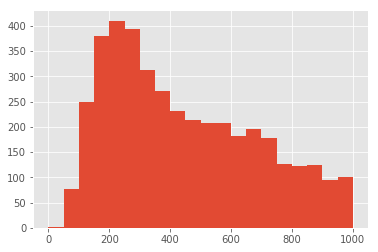

In [256]:
plt.hist(df1["duration"],bins=[0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000])
plt.show()

In [253]:
df1["duration"].describe()

count    4640.000000
mean      553.191164
std       401.171871
min        37.000000
25%       253.000000
50%       449.000000
75%       741.250000
max      4199.000000
Name: duration, dtype: float64

In [259]:
df_bulk=df1.loc[df1["duration"]>741.25]
df_bulk

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,default_binary,housing_binary,loan_binary,y_label
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,1
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,1
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,0,0,1
286,39,housemaid,married,basic.9y,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,1
388,28,unknown,single,unknown,unknown,yes,yes,telephone,may,tue,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,1,1
389,44,services,married,high.school,no,yes,no,telephone,may,tue,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,1
446,42,technician,married,professional.course,no,no,no,telephone,may,tue,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,0,0,1
469,42,management,married,university.degree,no,no,no,telephone,may,tue,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,0,0,1
504,39,services,married,high.school,unknown,yes,no,telephone,may,tue,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,1,0,1
556,42,blue-collar,married,high.school,no,no,yes,telephone,may,tue,...,1.1,93.994,-36.4,4.857,5191.0,yes,0,0,1,1


In [260]:
df1["age"].describe()

count    4640.000000
mean       40.913147
std        13.837476
min        17.000000
25%        31.000000
50%        37.000000
75%        50.000000
max        98.000000
Name: age, dtype: float64

In [263]:
df1["emp.var.rate"].describe()

count    4640.000000
mean       -1.233448
std         1.623626
min        -3.400000
25%        -1.800000
50%        -1.800000
75%        -0.100000
max         1.400000
Name: emp.var.rate, dtype: float64

In [264]:
df1["emp.var.rate"].value_counts()

-1.8    1461
 1.4     866
-2.9     594
-3.4     454
-1.7     403
-1.1     301
 1.1     240
-0.1     232
-3.0      88
-0.2       1
Name: emp.var.rate, dtype: int64

In [266]:
df1["euribor3m"].describe()

count    4640.000000
mean        2.123135
std         1.742598
min         0.634000
25%         0.849000
50%         1.266000
75%         4.406000
max         5.045000
Name: euribor3m, dtype: float64

In [267]:
df1["euribor3m"]

4.962    144
1.365    136
1.405    135
4.963    126
1.266    104
1.260    102
4.961     90
0.715     85
0.879     84
0.714     73
4.857     72
4.965     64
1.281     63
1.250     60
4.968     57
1.354     57
4.960     57
4.964     55
4.864     53
4.957     53
0.884     50
1.262     50
4.076     50
4.966     48
0.720     47
4.120     43
1.291     41
1.268     40
4.860     38
0.883     38
        ... 
4.406      2
0.732      2
0.750      2
1.224      2
1.030      2
4.592      2
0.713      2
4.343      2
0.690      2
1.778      2
4.918      2
1.584      2
4.474      2
0.993      2
1.007      2
0.933      1
0.711      1
0.895      1
1.629      1
0.771      1
0.766      1
0.944      1
0.749      1
0.700      1
0.752      1
0.965      1
3.053      1
0.921      1
1.018      1
1.384      1
Name: euribor3m, Length: 287, dtype: int64

In [268]:
df1["nr.employed"].describe()  

count    4640.000000
mean     5095.115991
std        87.572641
min      4963.600000
25%      5017.500000
50%      5099.100000
75%      5191.000000
max      5228.100000
Name: nr.employed, dtype: float64

In [269]:
df1["campaign"].describe()  

count    4640.000000
mean        2.051724
std         1.666245
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        23.000000
Name: campaign, dtype: float64

In [270]:
df1["campaign"].value_counts()

1     2300
2     1211
3      574
4      249
5      120
6       75
7       38
9       17
8       17
10      12
11      12
17       4
13       4
12       3
15       2
14       1
23       1
Name: campaign, dtype: int64